In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import sklearn as sk

In [2]:
# from user side

# location
# severity : low, medium , high
# capacity-need : small, medium , large
# service-need : food and water, shelter , evacuation , medical , fire , workforce , protection
# specialization-need : medical , water rescue , search and rescue , fire responce ,  evacuation , earthquake-responce
# medical-facilities-need : basic , trauma care , surgical facilities ,intensive care units
# supplies and resources : low , high


In [3]:
# from rescue team side
# location
# severity : low , medium , high
# capacity : small, medium , large
# services : food and water, shelter , evacuation , medical , fire , workforce , protection
# availability : available , full , temprarily unavailable
# specialization : medical , water rescue , search and rescue , fire responce , evacuation ,earthquake-responce
# medical facilities : basic , trauma care , surgical facilities ,intensive care units
# supplies and resources : well-stocked , limited supplies 

In [87]:
from random import choices , choice , randint , uniform, sample

In [123]:
sample([1,2,3,4,5,6],k=randint(1,6))

[3, 2, 1, 5, 4, 6]

In [128]:
severity=['low','medium','high']
capacity=['small','medium','high']
services=['food and water','shelter','evacuation','medical','fire','workforce','protection']
availability=['available','full','temprarily unavailable']
specialization=['medical','water rescue' , 'search and rescue' , 'fire responce' , 'evacuation' ,'earthquake-responce']
medical_facility=['basic' , 'trauma care' , 'surgical facilities' ,'intensive care units']
supply_and_resource=['well-stocked' , 'limited supplies']

In [459]:
severity = ["low", "medium", "high"]
capacity = ["small", "medium", "large"]
services = ["medical care", "food and water", "transportation", "language assistance", "counseling"]
availability = ["available", "almost full", "full", "temporarily unavailable"]
specialization = ["medical", "water rescue", "search and rescue", "fire response", "mental health support"]
medical_facility = ["basic first aid", "trauma care", "surgical facilities", "intensive care units", "pediatric care"]
supply_and_resource = ["well-stocked", "limited supplies", "medical equipment available", "pharmaceuticals available"]
calamities = ["earthquake", "flood", "fire", "hurricane", "tsunami", "pandemic"]


In [674]:
def generate(severity, capacity, services, availability, specialization, medical_facility, supply_and_resource, calamities):
    loc = {"lat": uniform(6, 36), "long": uniform(68, 98)}
    sev = sample(severity, k=1)
    cap = sample(capacity, k=1)
    serv = sample(services, k=randint(1, len(services)))
    avail = sample(availability, k=1)
    special = sample(specialization, k=randint(1, len(specialization)))
    med = sample(medical_facility, k=randint(1, len(medical_facility)))
    resource = sample(supply_and_resource, k=1)
    calamity_needs = sample(calamities, k=randint(1, len(calamities)))
    
    return loc, sev, cap, serv, avail, special, med, resource, calamity_needs


In [675]:

data = [generate(severity, capacity, services, availability, specialization, medical_facility, supply_and_resource, calamities) for _ in range(100)]
columns = ["Location", "Severity", "Capacity", "Services", "Availability", "Specialization", "Medical Facility", "Supply and Resource","calamities"]
df = pd.DataFrame(data, columns=columns)


In [676]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [677]:
from sklearn.preprocessing import MultiLabelBinarizer
one_hot_encoder=MultiLabelBinarizer()

In [678]:
df_one_hot=df.copy()

In [691]:
classes=[]

In [699]:
for column in columns[1:]:
    label_arr=df[column].tolist()
    one_hot_encoder=MultiLabelBinarizer()
    one_hot=one_hot_encoder.fit_transform(label_arr)
    classes.append(one_hot_encoder.classes_)
    
    df[column]=one_hot_encoder.inverse_transform(one_hot)
    
    df_one_hot[column]=one_hot.tolist()
    

In [700]:
severity = classes[0]
capacity = classes[1]
services = classes[2]
availability = classes[3]
specialization = classes[4]
medical_facility = classes[5]
supply_and_resource = classes[6]
calamities = classes[7]


In [701]:
df_one_hot

,Location,Severity,Capacity,Services,Availability,Specialization,Medical Facility,Supply and Resource,calamities
0,"{'lat': 19.07139243026971, 'long': 92.41265966...","[0, 1, 0]","[1, 0, 0]","[0, 0, 1, 1, 0]","[0, 0, 1, 0]","[0, 1, 0, 0, 0]","[1, 1, 1, 1, 0]","[0, 0, 1, 0]","[0, 0, 0, 0, 1, 0]"
1,"{'lat': 17.19905760570626, 'long': 76.14522245...","[1, 0, 0]","[1, 0, 0]","[1, 1, 1, 1, 1]","[0, 0, 0, 1]","[1, 0, 1, 1, 0]","[0, 1, 1, 0, 1]","[0, 0, 0, 1]","[1, 1, 1, 1, 1, 1]"
2,"{'lat': 10.161415110789203, 'long': 83.8609869...","[0, 0, 1]","[0, 0, 1]","[0, 1, 0, 0, 1]","[1, 0, 0, 0]","[1, 1, 1, 1, 1]","[1, 1, 1, 1, 1]","[0, 0, 0, 1]","[1, 1, 1, 0, 0, 1]"
3,"{'lat': 11.995924862998962, 'long': 80.1943897...","[1, 0, 0]","[0, 1, 0]","[1, 1, 1, 1, 1]","[0, 1, 0, 0]","[1, 1, 1, 1, 1]","[1, 0, 1, 1, 0]","[0, 1, 0, 0]","[1, 1, 1, 1, 1, 1]"
4,"{'lat': 11.887721552767431, 'long': 81.2763045...","[0, 0, 1]","[0, 1, 0]","[1, 0, 1, 1, 0]","[1, 0, 0, 0]","[0, 0, 0, 1, 1]","[1, 1, 1, 1, 1]","[0, 0, 0, 1]","[0, 1, 1, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...
95,"{'lat': 25.129858847765714, 'long': 96.2136184...","[0, 0, 1]","[0, 1, 0]","[1, 1, 0, 1, 1]","[0, 0, 0, 1]","[0, 0, 0, 1, 0]","[1, 1, 1, 0, 1]","[0, 0, 0, 1]","[1, 0, 1, 1, 1, 1]"
96,"{'lat': 11.197508616938034, 'long': 97.5925954...","[0, 0, 1]","[0, 0, 1]","[1, 1, 1, 1, 1]","[0, 1, 0, 0]","[0, 0, 0, 0, 1]","[1, 0, 1, 1, 1]","[0, 0, 1, 0]","[1, 0, 0, 1, 1, 0]"
97,"{'lat': 14.962117936161405, 'long': 90.2879030...","[0, 1, 0]","[1, 0, 0]","[0, 1, 1, 1, 0]","[0, 0, 1, 0]","[1, 1, 0, 0, 0]","[1, 1, 0, 1, 0]","[0, 1, 0, 0]","[1, 1, 0, 0, 1, 1]"
98,"{'lat': 13.644678188920732, 'long': 69.1168914...","[1, 0, 0]","[1, 0, 0]","[0, 1, 1, 1, 0]","[0, 0, 1, 0]","[1, 1, 1, 1, 1]","[1, 0, 1, 0, 0]","[1, 0, 0, 0]","[0, 1, 1, 1, 1, 1]"


In [703]:
df

,Location,Severity,Capacity,Services,Availability,Specialization,Medical Facility,Supply and Resource,calamities
0,"{'lat': 19.07139243026971, 'long': 92.41265966...","(low,)","(large,)","(language assistance, medical care)","(full,)","(medical,)","(basic first aid, intensive care units, pediat...","(pharmaceuticals available,)","(pandemic,)"
1,"{'lat': 17.19905760570626, 'long': 76.14522245...","(high,)","(large,)","(counseling, food and water, language assistan...","(temporarily unavailable,)","(fire response, mental health support, search ...","(intensive care units, pediatric care, trauma ...","(well-stocked,)","(earthquake, fire, flood, hurricane, pandemic,..."
2,"{'lat': 10.161415110789203, 'long': 83.8609869...","(medium,)","(small,)","(food and water, transportation)","(almost full,)","(fire response, medical, mental health support...","(basic first aid, intensive care units, pediat...","(well-stocked,)","(earthquake, fire, flood, tsunami)"
3,"{'lat': 11.995924862998962, 'long': 80.1943897...","(high,)","(medium,)","(counseling, food and water, language assistan...","(available,)","(fire response, medical, mental health support...","(basic first aid, pediatric care, surgical fac...","(medical equipment available,)","(earthquake, fire, flood, hurricane, pandemic,..."
4,"{'lat': 11.887721552767431, 'long': 81.2763045...","(medium,)","(medium,)","(counseling, language assistance, medical care)","(almost full,)","(search and rescue, water rescue)","(basic first aid, intensive care units, pediat...","(well-stocked,)","(fire, flood)"
...,...,...,...,...,...,...,...,...,...
95,"{'lat': 25.129858847765714, 'long': 96.2136184...","(medium,)","(medium,)","(counseling, food and water, medical care, tra...","(temporarily unavailable,)","(search and rescue,)","(basic first aid, intensive care units, pediat...","(well-stocked,)","(earthquake, flood, hurricane, pandemic, tsunami)"
96,"{'lat': 11.197508616938034, 'long': 97.5925954...","(medium,)","(small,)","(counseling, food and water, language assistan...","(available,)","(water rescue,)","(basic first aid, pediatric care, surgical fac...","(pharmaceuticals available,)","(earthquake, hurricane, pandemic)"
97,"{'lat': 14.962117936161405, 'long': 90.2879030...","(low,)","(large,)","(food and water, language assistance, medical ...","(full,)","(fire response, medical)","(basic first aid, intensive care units, surgic...","(medical equipment available,)","(earthquake, fire, pandemic, tsunami)"
98,"{'lat': 13.644678188920732, 'long': 69.1168914...","(high,)","(large,)","(food and water, language assistance, medical ...","(full,)","(fire response, medical, mental health support...","(basic first aid, pediatric care)","(limited supplies,)","(fire, flood, hurricane, pandemic, tsunami)"


In [705]:
from scipy.spatial.distance import cosine
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [717]:
def similarity(user,rescue):
    point1=np.array([user['Location']['lat'],user['Location']['long']])
    point2=np.array([rescue['Location']['lat'],rescue['Location']['long']])
    dist=np.linalg.norm(point1 - point2)
    cos_dist=cosine(user['Location']['lat'],rescue['Location']['lat'])
    cos_dist+=cosine(user['Location']['long'],rescue['Location']['long'])
    sev=cosine(user['Severity'],rescue['Severity'])
    cap=cosine(user['Capacity'],rescue['Capacity'])
    serv=cosine(user['Service'],rescue['Services'])
    spec=cosine(user['Specialization'],rescue['Specialization'])
    med=cosine(user['Medical Facility'],rescue['Medical Facility'])
    suppy_and_rescource=cosine(user['Supply and Resource'],rescue['Supply and Resource'])
    cal=cosine(user['calamities'],rescue['calamities'])
    
    dist=dist/100
    
    similarities = np.array([0.9*dist,0.8*sev,0.5*cap,0.3*serv,0.5*spec,0.2*med,0.2*suppy_and_rescource, 0.4*cal])
    return dist ,similarities 
    

In [718]:
def encoder(values,labels):
    l=np.zeros(len(labels))
    for i in range(len(labels)):
        if labels[i]  in values:
            l[i]=1
    return l

In [719]:
def process(user):
    user_={
        'Location':user['Location'],
        'Severity': encoder(user['Severity'],severity),
        'Capacity': encoder(user['Capacity'],capacity),
        'Service':encoder(user['Service'],services),
        'Specialization': encoder(user['Specialization'],specialization),
        'Medical Facility':encoder(user['Medical Facility'],medical_facility),
        'Supply and Resource':encoder(user['Supply and Resource'],supply_and_resource),
        'calamities':encoder(user['calamities'],calamities)
    }
    
    return user_

In [730]:
def similarity_search(user,df,df_one_hot,k=3):
    dist=[]
    user_=process(user)
    print("*")
    for i in range(len(df)):
        rescue=df_one_hot.iloc[i].to_dict()
        si=similarity(user_,rescue)
        
        dist.append((i,si[0],si[1],np.sum(si[1])))
        
    dist=np.array(dist)
    dist_id=np.argsort(dist[:,-1])   
    dist=dist[dist_id[:k]]
    
    user_df = pd.DataFrame.from_dict({key: [value] for key, value in user.items()})
    top_k1=[]
    for i in dist_id[:k]:
        top_k1.append(df.iloc[i].to_dict())
    top_k2=[]
    for i in dist_id[:k]:
        top_k2.append(df_one_hot.iloc[i].to_dict())
        
    rescue_df=pd.DataFrame(top_k1)
    rescue_df_one_hot=pd.DataFrame(top_k2)

    
    return dist , user_df ,rescue_df,rescue_df_one_hot

In [763]:
user={
    'Location':{
        'lat':26,
        'long':80
    },
    'Severity': ['high'],
    'Capacity': ['large'],
    'Service':['medical care','food and water'],
    'Specialization': ['medical'],
    'Medical Facility': ['intensive care units'],
    'Supply and Resource':['pharmaceutical available'],
    'calamities': ['pandemic']
}

In [764]:
dist, user_df, rescue_df,rescue_df_one_hot=similarity_search(user,df,df_one_hot)

*


c:\Users\nagas\anaconda3\envs\gpu\lib\site-packages\scipy\spatial\distance.py:630: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
C:\Users\nagas\AppData\Local\Temp\ipykernel_29732\1301299703.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dist=np.array(dist)


In [765]:
user_df

,Location,Severity,Capacity,Service,Specialization,Medical Facility,Supply and Resource,calamities
0,"{'lat': 26, 'long': 80}",[high],[large],"[medical care, food and water]",[medical],[intensive care units],[pharmaceutical available],[pandemic]


In [766]:
rescue_df

,Location,Severity,Capacity,Services,Availability,Specialization,Medical Facility,Supply and Resource,calamities
0,"{'lat': 31.223286433691662, 'long': 84.0665321...","(high,)","(large,)","(food and water, language assistance, transpor...","(temporarily unavailable,)","(fire response, medical, mental health support...","(basic first aid, intensive care units, trauma...","(well-stocked,)","(fire, pandemic, tsunami)"
1,"{'lat': 29.520991748985878, 'long': 87.6405293...","(high,)","(large,)","(counseling, language assistance, transportation)","(temporarily unavailable,)","(medical, mental health support)","(intensive care units, pediatric care, trauma ...","(medical equipment available,)","(earthquake, fire, flood, hurricane, pandemic,..."
2,"{'lat': 13.644678188920732, 'long': 69.1168914...","(high,)","(large,)","(food and water, language assistance, medical ...","(full,)","(fire response, medical, mental health support...","(basic first aid, pediatric care)","(limited supplies,)","(fire, flood, hurricane, pandemic, tsunami)"


In [785]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [786]:
x=[]
y=[]
for i in range(len(df)):
    x.append(df.iloc[i]['Location']['lat'])
    y.append(df.iloc[i]['Location']['long'])

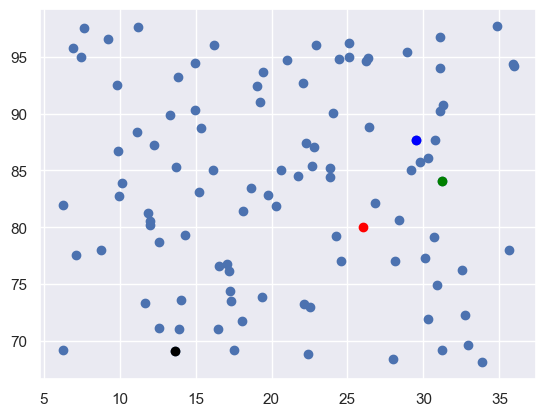

In [789]:
plt.scatter(x,y)
plt.scatter(rescue_df.iloc[0]['Location']['lat'],rescue_df.iloc[0]['Location']['long'],color='green')
plt.scatter(rescue_df.iloc[1]['Location']['lat'],rescue_df.iloc[1]['Location']['long'],color='blue')
plt.scatter(rescue_df.iloc[2]['Location']['lat'],rescue_df.iloc[2]['Location']['long'],color='black')
plt.scatter(user['Location']['lat'],user['Location']['long'],color='red')

In [784]:
scaled_data

array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

In [666]:
df

,Location,Severity,Capacity,Services,Availability,Specialization,Medical Facility,Supply and Resource,calamities
0,"{'lat': 18.99210381478266, 'long': 91.83276676...",[low],[small],"[transportation, food and water, counseling, l...",[almost full],"[fire response, mental health support, medical]","[pediatric care, basic first aid, trauma care,...",[limited supplies],"[earthquake, hurricane, fire]"
1,"{'lat': 22.708118164068956, 'long': 71.5971675...",[low],[small],"[counseling, language assistance]",[temporarily unavailable],"[medical, water rescue, fire response, search ...","[pediatric care, intensive care units, basic f...",[pharmaceuticals available],"[earthquake, flood, pandemic, fire, hurricane,..."
2,"{'lat': 16.019939650568524, 'long': 96.6139289...",[high],[medium],"[counseling, food and water, language assistan...",[available],[fire response],"[pediatric care, trauma care, basic first aid,...",[pharmaceuticals available],"[flood, pandemic, fire]"
3,"{'lat': 23.475606034163725, 'long': 86.0377105...",[low],[large],[counseling],[available],"[mental health support, water rescue, fire res...","[intensive care units, basic first aid]",[limited supplies],"[tsunami, fire]"
4,"{'lat': 28.065573241370984, 'long': 95.2238131...",[high],[medium],"[medical care, food and water, counseling]",[almost full],[medical],"[surgical facilities, pediatric care, intensiv...",[well-stocked],[hurricane]
...,...,...,...,...,...,...,...,...,...
95,"{'lat': 14.680622520641728, 'long': 81.6541417...",[medium],[large],"[language assistance, medical care, food and w...",[available],"[water rescue, search and rescue, fire response]",[intensive care units],[well-stocked],"[hurricane, tsunami, pandemic, earthquake, fir..."
96,"{'lat': 7.0978963925043494, 'long': 90.3439157...",[high],[large],"[transportation, food and water, language assi...",[available],[medical],"[basic first aid, surgical facilities, intensi...",[pharmaceuticals available],"[fire, tsunami, pandemic, flood, earthquake, h..."
97,"{'lat': 7.629951089616837, 'long': 76.37331304...",[medium],[medium],"[medical care, language assistance, transporta...",[temporarily unavailable],"[fire response, mental health support, medical...","[surgical facilities, trauma care, basic first...",[pharmaceuticals available],[fire]
98,"{'lat': 30.135763934989612, 'long': 84.8690429...",[medium],[medium],"[medical care, food and water, counseling, tra...",[available],"[search and rescue, water rescue, mental healt...",[surgical facilities],[well-stocked],"[flood, pandemic, hurricane, earthquake, tsunami]"


In [790]:
import pinecone

c:\Users\nagas\anaconda3\envs\gpu\lib\site-packages\pinecone\index.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [792]:
import os

In [796]:
os.environ['PINECONE_API_KEY']='6b699f4f-5b1d-471a-adbe-918747981c1b'
os.environ['PINECONE_ENV']='us-west4-gcp-free'

In [797]:
pinecone.init(
    api_key=os.environ['PINECONE_API_KEY'],
    environment=os.environ['PINECONE_ENV']
)

In [812]:
index_name='sih'
if index_name not in pinecone.list_indexes():
    pinecone.create_index(
        index_name, 
        dimension=64,
        metric='cosine'
    )

In [836]:
index = pinecone.Index(index_name) 

res=index.upsert([
    ("A", [[1,12,1123,0,0,0,0,0],[1,12,1123,0,0,0,0,0],[1,12,1123,0,0,0,0,0],[1,12,1123,0,0,0,0,0],[1,12,1123,0,0,0,0,0],[1,12,1123,0,0,0,0,0],[1,12,1123,0,0,0,0,0],[1,12,1123,0,0,0,0,0]])
])

In [839]:
res=index.query(
    vector=[[1,2,11,4,11,12,7,8],[1,2,3,4,11,12,7,8],[1,2,3,4,11,12,7,8],[1,2,3,4,11,12,7,8],[1,2,3,4,11,12,7,8],[1,2,3,4,11,12,7,8],[1,2,3,4,11,12,7,8],[1,2,3,4,11,12,7,8]],
    top_k=4,
    include_metadata=True,
    include_values=True
)

In [844]:
len(res['matches'][0]['values'])

64

In [859]:
def preprocess_for_upload(data,top_k=3):
    values=np.zeros((8,8))
    values[0][0]=data['Location']['lat']
    values[0][1]=data['Location']['long']
        
    values=encoder(data['Severity'],classes[0],values,1)
    values=encoder(data['Capacity'],classes[1],values,2)
    values=encoder(data['Service'],classes[2],values,3)
    values=encoder(data['Specialization'],classes[4],values,4)
    values=encoder(data['Medical Facility'],classes[5],values,5)
    values=encoder(data['Supply and Resource'],classes[6],values,6)
    values=encoder(data['calamities'],classes[7],values,7)

    return values
    
def encoder(values,labels,array,j):
    for i in range(len(labels)):
        if labels[i]  in values:
            array[j][i]=1
    return l

In [860]:
classes

[array(['high', 'low', 'medium'], dtype=object),
 array(['large', 'medium', 'small'], dtype=object),
 array(['counseling', 'food and water', 'language assistance',
        'medical care', 'transportation'], dtype=object),
 array(['almost full', 'available', 'full', 'temporarily unavailable'],
       dtype=object),
 array(['fire response', 'medical', 'mental health support',
        'search and rescue', 'water rescue'], dtype=object),
 array(['basic first aid', 'intensive care units', 'pediatric care',
        'surgical facilities', 'trauma care'], dtype=object),
 array(['limited supplies', 'medical equipment available',
        'pharmaceuticals available', 'well-stocked'], dtype=object),
 array(['earthquake', 'fire', 'flood', 'hurricane', 'pandemic', 'tsunami'],
       dtype=object)]

In [861]:
user

{'Location': {'lat': 26, 'long': 80},
 'Severity': ['high'],
 'Capacity': ['large'],
 'Service': ['medical care', 'food and water'],
 'Specialization': ['medical'],
 'Medical Facility': ['intensive care units'],
 'Supply and Resource': ['pharmaceutical available'],
 'calamities': ['pandemic']}

In [862]:
preprocess_for_upload(user)

IndexError: index 3 is out of bounds for axis 0 with size 3

In [867]:
user.items()

dict_items([('Location', {'lat': 26, 'long': 80}), ('Severity', ['high']), ('Capacity', ['large']), ('Service', ['medical care', 'food and water']), ('Specialization', ['medical']), ('Medical Facility', ['intensive care units']), ('Supply and Resource', ['pharmaceutical available']), ('calamities', ['pandemic'])])

In [869]:
from data_preprocessing import DataPreprocesser

ModuleNotFoundError: No module named 'data_preprocessing'